Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("drive/MyDrive/Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('drive/MyDrive/Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
70


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
validation_split=0.2 
seed_train_validation=123

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=seed_train_validation,
  validation_split = validation_split,
  subset = "training",
  color_mode="rgb", #Default value is rgb 
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=seed_train_validation,
  validation_split = validation_split,
  subset = "validation", 
  color_mode="rgb", #Default value is rgb 
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
val_class_names = val_ds.class_names
print(val_class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

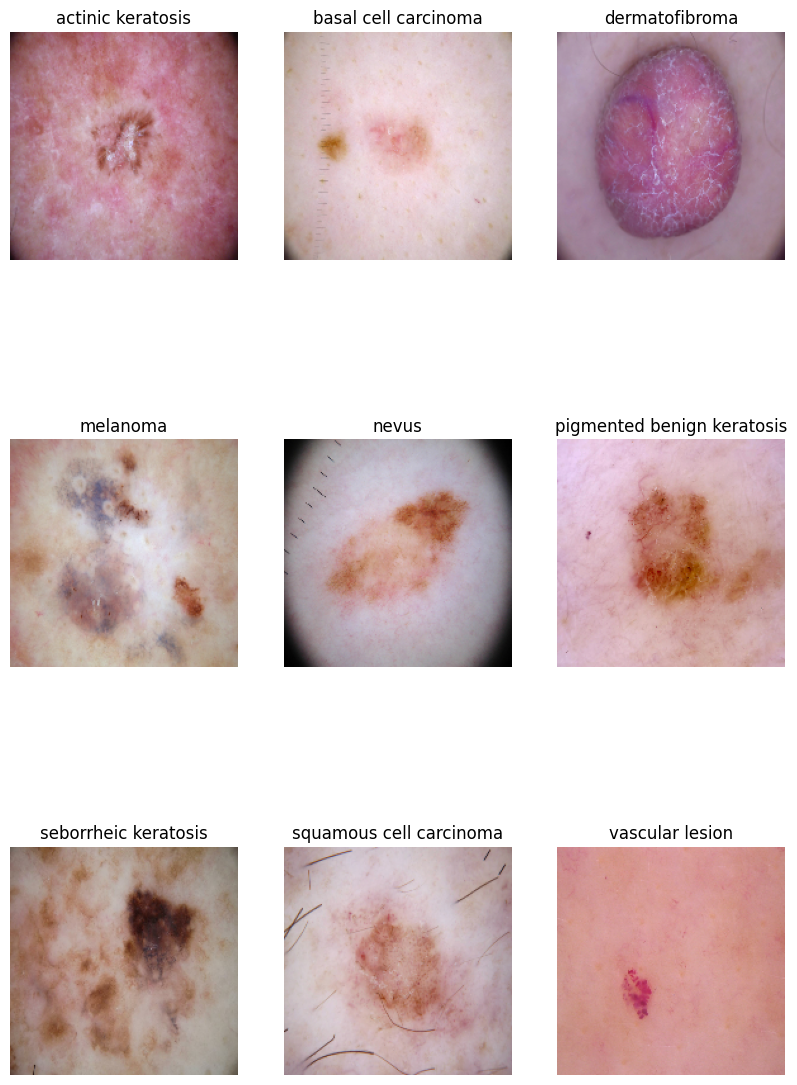

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,15))

for i in range(len(class_names)):
    filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here

model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))

# First convolution Layer
model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second Convoltuional Layer
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dense(len(class_names)))
model.add(layers.Activation('softmax'))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 activation_14 (Activation)  (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 activation_15 (Activation)  (None, 87, 87, 64)        0         
                                                      

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 83s 905ms/step - loss: 2.0738 - accuracy: 0.2941 - val_loss: 1.6615 - val_accuracy: 0.4340
Epoch 2/20
56/56 [==============================] - 3s 58ms/step - loss: 1.7340 - accuracy: 0.3772 - val_loss: 1.5851 - val_accuracy: 0.4720
Epoch 3/20
56/56 [==============================] - 3s 58ms/step - loss: 1.5272 - accuracy: 0.4699 - val_loss: 1.4995 - val_accuracy: 0.5078
Epoch 4/20
56/56 [==============================] - 3s 62ms/step - loss: 1.5244 - accuracy: 0.4665 - val_loss: 1.4625 - val_accuracy: 0.5056
Epoch 5/20
56/56 [==============================] - 3s 59ms/step - loss: 1.4281 - accuracy: 0.5067 - val_loss: 1.5095 - val_accuracy: 0.4922
Epoch 6/20
56/56 [==============================] - 3s 58ms/step - loss: 1.4048 - accuracy: 0.4911 - val_loss: 1.3902 - val_accuracy: 0.5347
Epoch 7/20
56/56 [==============================] - 3s 61ms/step - loss: 1.2724 - accuracy: 0.5430 - val_loss: 1.5766 - val_accuracy: 0.4899
Epoch 8/20


### Visualizing training results

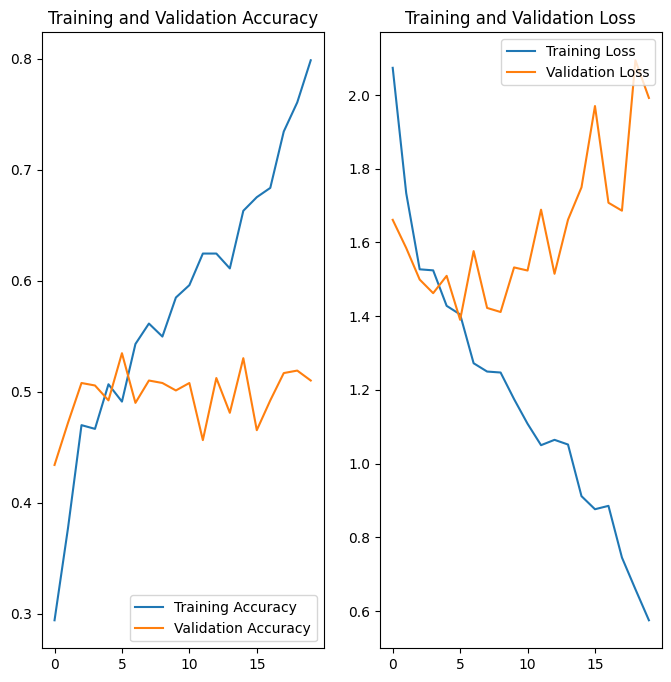

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit



```
# This is formatted as code
```

### Observations
**Training accuracy is high and validation accuracy is low  hence there is an overfitting problem**


In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

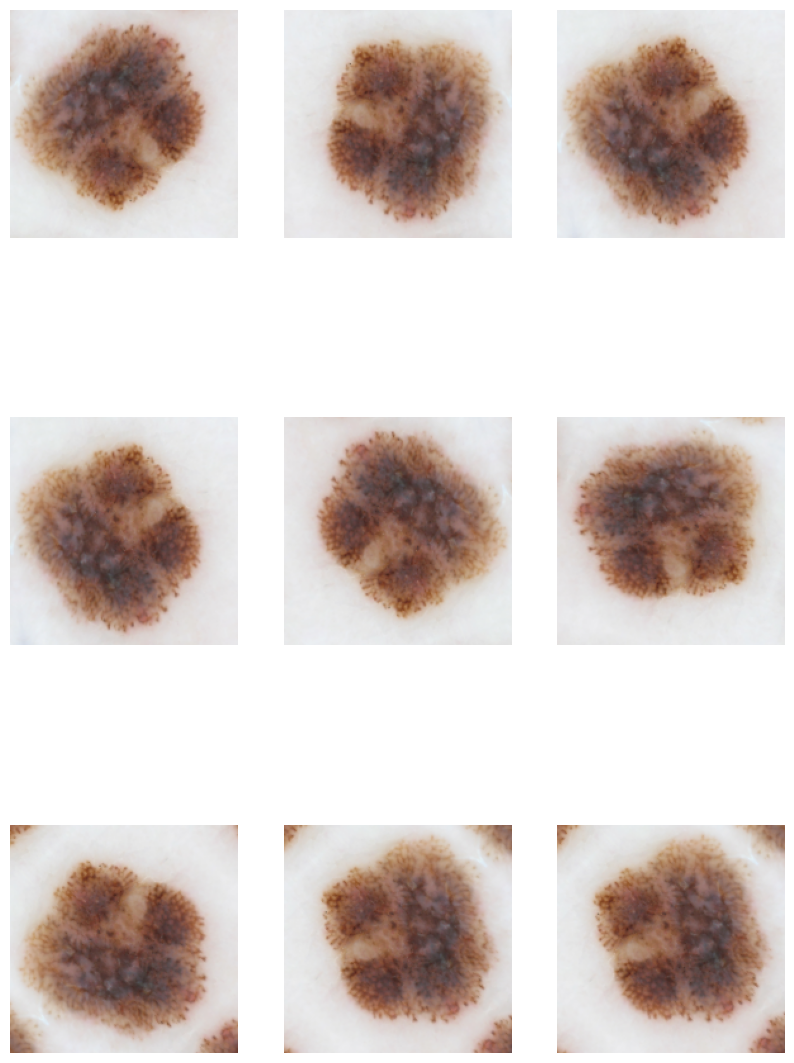

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 15))
for images, _ in train_ds.take(1):   
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")                       


### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings


model2 = Sequential()
model2.add(data_augmentation)

model2.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))

# First convolution Layer
model2.add(layers.Conv2D(32, (3, 3)))
model2.add(layers.Activation('relu'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Dropout(0.25))

# Second Convoltuional Layer
model2.add(layers.Conv2D(64, (3, 3)))
model2.add(layers.Activation('relu'))
model2.add(layers.Conv2D(64, (3, 3)))
model2.add(layers.Activation('relu'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Dropout(0.25))

model2.add(layers.Conv2D(128, (3, 3)))
model2.add(layers.Activation('relu'))
model2.add(layers.Conv2D(128, (3, 3)))
model2.add(layers.Activation('relu'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))

model2.add(layers.Flatten())
model2.add(layers.Dense(512))
model2.add(layers.Activation('relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(len(class_names)))
model2.add(layers.Activation('softmax'))



### Compiling the model

In [ ]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [ ]:
epochs = 20
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 8s 88ms/step - loss: 2.1394 - accuracy: 0.1741 - val_loss: 2.0426 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 5s 86ms/step - loss: 2.0303 - accuracy: 0.2098 - val_loss: 2.0026 - val_accuracy: 0.2304
Epoch 3/20
56/56 [==============================] - 5s 83ms/step - loss: 1.8942 - accuracy: 0.2829 - val_loss: 1.7737 - val_accuracy: 0.3490
Epoch 4/20
56/56 [==============================] - 5s 82ms/step - loss: 1.7952 - accuracy: 0.3315 - val_loss: 1.7178 - val_accuracy: 0.3557
Epoch 5/20
56/56 [==============================] - 5s 85ms/step - loss: 1.7135 - accuracy: 0.3644 - val_loss: 1.6159 - val_accuracy: 0.4474
Epoch 6/20
56/56 [==============================] - 5s 82ms/step - loss: 1.6603 - accuracy: 0.3929 - val_loss: 1.6729 - val_accuracy: 0.3691
Epoch 7/20
56/56 [==============================] - 5s 82ms/step - loss: 1.6425 - accuracy: 0.3951 - val_loss: 1.5808 - val_accuracy: 0.4318
Epoch 8/20
56

### Visualizing the results

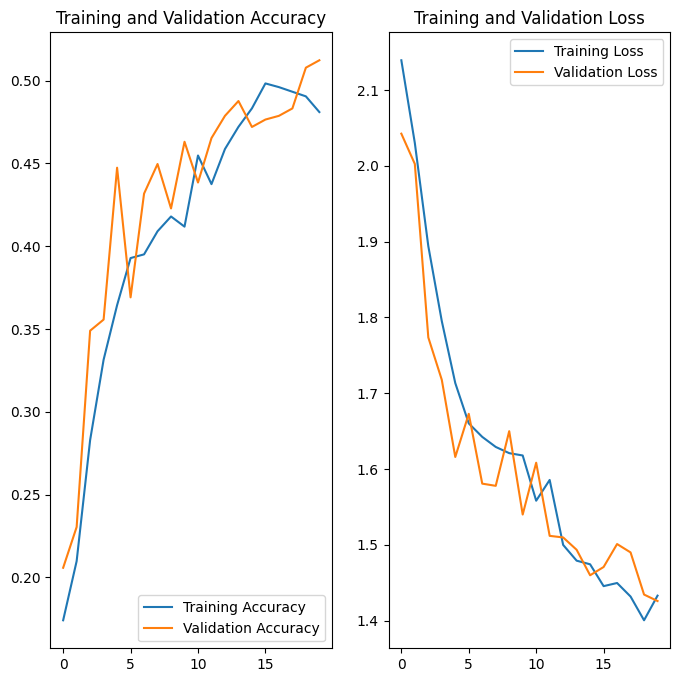

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

####Observations
- After augumentation and adding dropout layer  which  has handled overfitting
- But still accuracy is very low (Underfitting)

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
#Reference https://stackoverflow.com/questions/75110698/how-to-find-how-many-images-belong-to-which-class-in-keras
def class_distribution_count(directory):
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])
class_distribution_df=class_distribution_count(data_dir_train)
class_distribution_df

,Class,No. of Image
0,melanoma,438
1,pigmented benign keratosis,462
2,nevus,357
3,basal cell carcinoma,376
4,actinic keratosis,114
5,squamous cell carcinoma,181
6,vascular lesion,139
7,seborrheic keratosis,77
8,dermatofibroma,95


<Axes: ylabel='Class'>

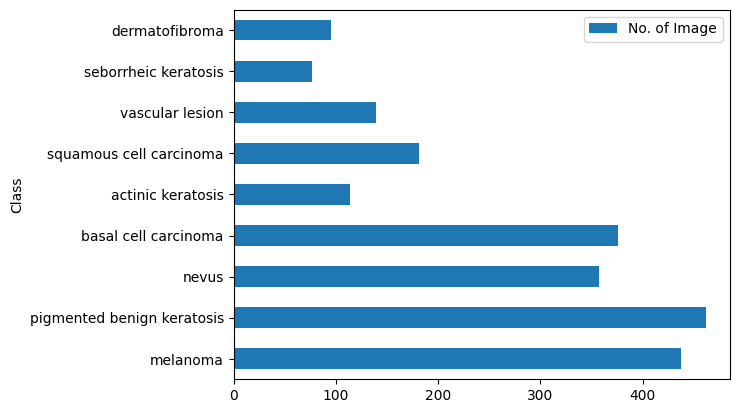

In [ ]:
class_distribution_df.plot.barh(x='Class', y='No. of Image', rot=0)

#### Observations
**Based on above distribution we could see huge class imbalance in the dataset**
#### - Which class has the least number of samples?
##### **As per the above distribution seborrheic keratosis has the least number of samples**
#### - Which classes dominate the data in terms proportionate number of samples?
##### **pigmented benign keratosis,melanoma,basal cell carcinoma	are top three in terms of no of samples**




#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(str(data_dir_train))

drive/MyDrive/Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset='/content/drive/MyDrive/Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F50F14EC9A0>: 100%|██████████| 500/500 [00:28<00:00, 17.39 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F50F43AFC10>: 100%|██████████| 500/500 [00:31<00:00, 16.03 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5181A55550>: 100%|██████████| 500/500 [00:23<00:00, 21.44 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F5181C96880>: 100%|██████████| 500/500 [01:51<00:00,  4.49 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F5181A241F0>: 100%|██████████| 500/500 [01:30<00:00,  5.50 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F51819C7C70>: 100%|██████████| 500/500 [00:24<00:00, 20.45 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F5181C96820>: 100%|██████████| 500/500 [00:48<00:00, 10.26 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F50F13E3040>: 100%|██████████| 500/500 [00:22<00:00, 22.28 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F50F159D430>: 100%|██████████| 500/500 [00:21<00:00, 22.90 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['drive/MyDrive/Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010376.jpg_7d948e80-9032-4883-b271-ab90c97e38d6.jpg',
 'drive/MyDrive/Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000533.jpg_26788e1e-51aa-443f-b563-f7b6d80fd5cb.jpg',
 'drive/MyDrive/Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010785.jpg_63d64896-c9ee-47cf-af3c-a9f9c3ee7d23.jpg',
 'drive/MyDrive/Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000417.jpg_7c546c3c-63c7-46e3-a68b-efe730d5cf0b.jpg',
 'drive/MyDrive/Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010863.jpg_d3918860-f8b5-4c87-892a-5ff30ead82aa.jpg',
 'drive/My

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)

In [ ]:
df2['Label'].value_counts()

melanoma                      500
pigmented benign keratosis    500
nevus                         500
basal cell carcinoma          500
actinic keratosis             500
squamous cell carcinoma       500
vascular lesion               500
seborrheic keratosis          500
dermatofibroma                500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train='/content/drive/MyDrive/Melanoma-Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training", #Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation", ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
model3 = Sequential()

model3.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))

#Try reducing the kernel size from 3,3 to 2,2
model3.add(layers.Conv2D(32, (2, 2)))
model3.add(layers.Activation('relu'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(layers.Dropout(0.25))

model3.add(layers.Conv2D(64, (2, 2)))
model3.add(layers.Activation('relu'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(layers.Dropout(0.25))

model3.add(layers.Conv2D(128, (2, 2)))
model3.add(layers.Activation('relu'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))


model3.add(layers.Flatten())
model3.add(layers.Dense(512))
model3.add(layers.Activation('relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.BatchNormalization())
model3.add(layers.Dense(len(class_names)))
model3.add(layers.Activation('softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50
169/169 [==============================] - 59s 198ms/step - loss: 2.3829 - accuracy: 0.1953 - val_loss: 3.7231 - val_accuracy: 0.1381
Epoch 2/50
169/169 [==============================] - 35s 200ms/step - loss: 1.9221 - accuracy: 0.2838 - val_loss: 3.0134 - val_accuracy: 0.1581
Epoch 3/50
169/169 [==============================] - 34s 195ms/step - loss: 1.7167 - accuracy: 0.3539 - val_loss: 3.0565 - val_accuracy: 0.1804
Epoch 4/50
169/169 [==============================] - 35s 200ms/step - loss: 1.5628 - accuracy: 0.4082 - val_loss: 2.0399 - val_accuracy: 0.2895
Epoch 5/50
169/169 [==============================] - 34s 194ms/step - loss: 1.4744 - accuracy: 0.4399 - val_loss: 1.8638 - val_accuracy: 0.3348
Epoch 6/50
169/169 [==============================] - 35s 201ms/step - loss: 1.3856 - accuracy: 0.4718 - val_loss: 1.7513 - val_accuracy: 0.3771
Epoch 7/50
169/169 [==============================] - 36s 205ms/step - loss: 1.3236 - accuracy: 0.4961 - val_loss: 2.0122 - val_ac

#### **Todo:**  Visualize the model results

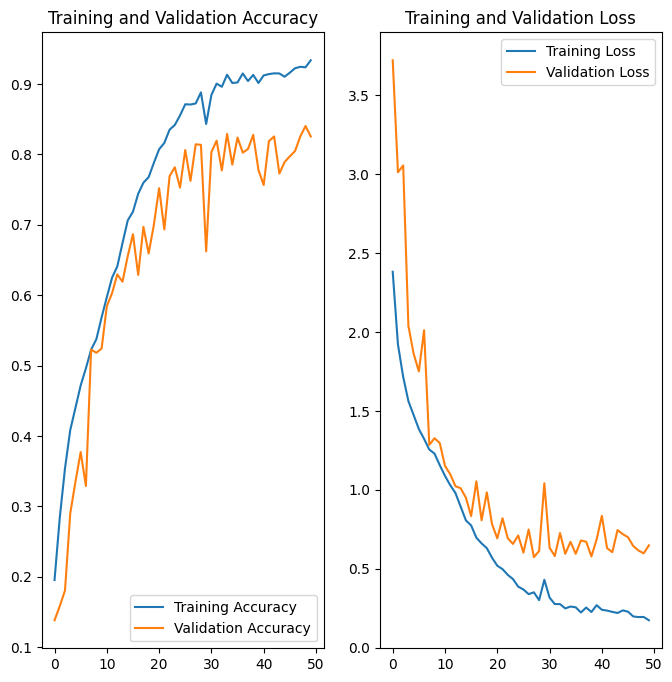

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
#### Observations
- After class rebalance accuracy of the model has improved
- Overfitting/underfitting has also come down
